# ChemShift Plot of 2CEF

## For first simuation in TIP4PEW

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# function to load the sparta+ pred file
def loadpred(file_name):
    f = open(file_name)
    r = f.readlines()
    content = []
    for i in range(27,len(r)):
        content.append(r[i].split())
    return content


def loadpred_CA(file_name):
    f = open(file_name)
    r = f.readlines()
    content = []
    for i in range(27,len(r)):
        content.append(r[i].split())

    CA_list = []
    for i in range(len(content)):
        if content[i][2] == 'CA':
            CA_list.append(content[i])
    
    CA_2shift = [float(item[3]) for item in CA_list]

    return CA_2shift


def RMSD(list_1,list_2):
    if len(list_1) != len(list_2):
        return 0
    else:
        rmsd = 0
        for i in range(len(list_1)):
            if list_1[i] != None and list_2[i] != None:
                rmsd += np.sqrt(list_1[i]-list_2[i])

In [86]:
# load pred file and seperate them in to different types of Chemical Shifts
pred = loadpred("2cef.md.pdb_pred_sim1.tab")

C_list = []
CA_list = []
CB_list = []
HA_list = []
HN_list = []
N_list = []
for i in range(len(pred)):
    if pred[i][2] == 'C':
        C_list.append(pred[i])
    if pred[i][2] == 'CA':
        CA_list.append(pred[i])
    if pred[i][2] == 'CB':
        CB_list.append(pred[i])
    if pred[i][2] == 'HA' or 'HA2':
        HA_list.append(pred[i])
    if pred[i][2] == 'HN':
        HN_list.append(pred[i])
    if pred[i][2] == 'N':
        N_list.append(pred[i])



In [87]:
# Prepare plot data
C_2shift = [float(item[3]) for item in C_list]
CA_2shift = [float(item[3]) for item in CA_list]
CB_2shift = [float(item[3]) for item in CB_list]
HA_2shift = [float(item[3]) for item in HA_list]
HN_2shift = [float(item[3]) for item in HN_list]
N_2shift = [float(item[3]) for item in N_list]


res_list = [item[0]+item[1] for item in CA_list]

print(res_list)

['1C', '2R', '3K', '4A', '5G', '6V', '7G', '8Q', '9S', '10W', '11K', '12E', '13N', '14S', '15P', '16L', '17N', '18V', '19S']


In [88]:
# CA Experimental
Experimental_data_raw = [None,None,56.2,52.4,40,62.3,45.2,55.7,58,57.5,55.6,56.3,53.3,55.8,None,55.16,53.1,62,60]
RCoil_data = [float(item[5]) for item in CA_list]

Experimental_data = []
for i in range(len(RCoil_data)):
    if Experimental_data_raw[i] != None:
        Experimental_data.append(Experimental_data_raw[i]-RCoil_data[i])
    else:
        Experimental_data.append(None)


print(Experimental_data)


[None, None, -0.08699999999999619, 0.36299999999999955, -5.100000000000001, 0.0, 0.10000000000000142, -0.10299999999999443, -0.20000000000000284, 0.15500000000000114, -0.6869999999999976, -0.10000000000000142, 0.25, -2.4000000000000057, None, 0.3199999999999932, 0.05000000000000426, -0.29999999999999716, 1.7999999999999972]


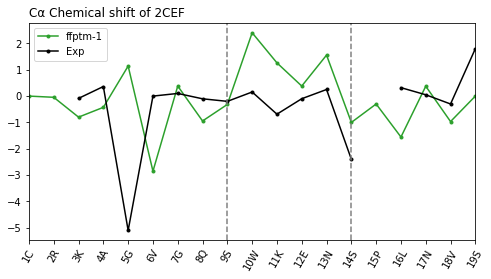

In [89]:
# Plotting!

plt.subplots(figsize=(8,4))

plt.plot(CA_2shift,'.-',label='ffptm-1',color="tab:green")
plt.plot(Experimental_data,'.-',label='Exp',color="black")



plt.title('Cα Chemical shift of 2CEF',loc='left')

plt.xlim(0, len(CA_2shift)-1)
plt.xticks(np.arange(0,len(res_list)),res_list,rotation='60')

# Tag modified residues
plt.axvline(x=8, ymin=0, ymax=1,color="grey",linestyle="--")
plt.axvline(x=13, ymin=0, ymax=1,color="grey",linestyle="--")

plt.legend()

plt.show()

## Adding more simuation in TIP4PEW

In [90]:
# Collection Data

Experimental_data = Experimental_data


In [102]:
# load pred file and seperate them in to different types of Chemical Shifts

CA_2shift_sim1 = loadpred_CA("2cef.md.pdb_pred_sim1.tab")
CA_2shift_sim2 = loadpred_CA("2cef.md.pdb_pred_sim2.tab")
CA_2shift_sim3 = loadpred_CA("2cef.md.pdb_pred_sim3.tab")
CA_2shift_sim4 = loadpred_CA("2cef.md.pdb_pred_sim4.tab")
CA_2shift_sim5 = loadpred_CA("2cef.md.pdb_pred_sim5.tab")



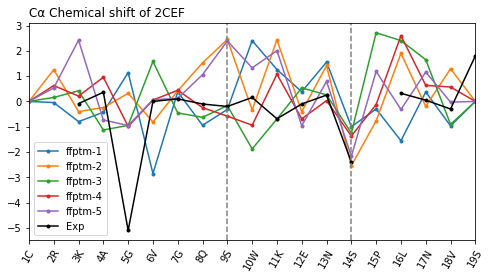

In [103]:
# Plotting!

plt.subplots(figsize=(8,4))

plt.plot(CA_2shift_sim1,'.-',label='ffptm-1')
plt.plot(CA_2shift_sim2,'.-',label='ffptm-2')
plt.plot(CA_2shift_sim3,'.-',label='ffptm-3')
plt.plot(CA_2shift_sim4,'.-',label='ffptm-4')
plt.plot(CA_2shift_sim5,'.-',label='ffptm-5')

plt.plot(Experimental_data,'.-',label='Exp',color="black")



plt.title('Cα Chemical shift of 2CEF',loc='left')

plt.xlim(0, len(CA_2shift)-1)
plt.xticks(np.arange(0,len(res_list)),res_list,rotation='60')

# Tag modified residues
plt.axvline(x=8, ymin=0, ymax=1,color="grey",linestyle="--")
plt.axvline(x=13, ymin=0, ymax=1,color="grey",linestyle="--")

plt.legend()

plt.show()

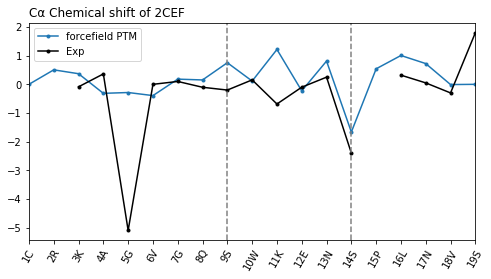

In [110]:
# Average Plotting!

CA_2shift_avg = [(CA_2shift_sim1[i]+CA_2shift_sim2[i]+CA_2shift_sim3[i]+CA_2shift_sim4[i]+CA_2shift_sim5[i])/5 for i in range(len(CA_2shift_sim1))]

plt.subplots(figsize=(8,4))

plt.plot(CA_2shift_avg,'.-',label='forcefield PTM')

plt.plot(Experimental_data,'.-',label='Exp',color="black")



plt.title('Cα Chemical shift of 2CEF',loc='left')

plt.xlim(0, len(CA_2shift)-1)
plt.xticks(np.arange(0,len(res_list)),res_list,rotation='60')

# Tag modified residues
plt.axvline(x=8, ymin=0, ymax=1,color="grey",linestyle="--")
plt.axvline(x=13, ymin=0, ymax=1,color="grey",linestyle="--")

plt.legend()

plt.show()